## Part (a) &mdash; Attenuation curves

In [5]:
import numpy as np
import matplotlib.pyplot as plt

from sedpy import attenuation
import fsps

In [2]:
# vector of wavelengths, in \AA
lambdas = np.linspace(1000,10000,5000)

In [3]:
# attenuation curves
powerlaw = attenuation.powerlaw(lambdas)
calzetti = attenuation.calzetti(lambdas)
cardelli = attenuation.cardelli(lambdas)
lmc = attenuation.lmc(lambdas)
smc = attenuation.smc(lambdas)

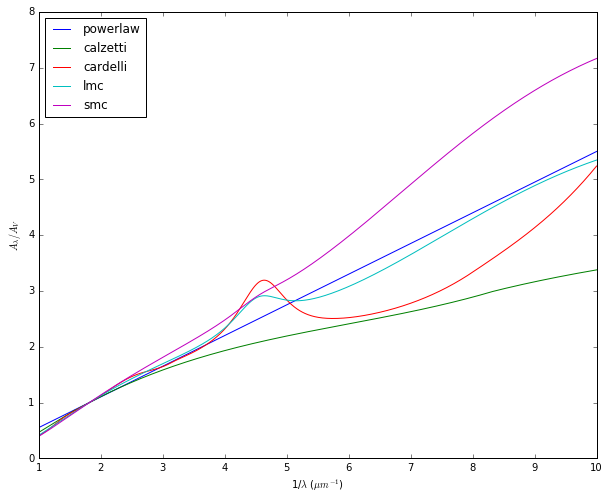

In [4]:
### plotting
fig = plt.figure(figsize=(10,8))
plt.plot(10**4/lambdas, powerlaw, label='powerlaw')
plt.plot(10**4/lambdas, calzetti, label='calzetti')
plt.plot(10**4/lambdas, cardelli, label='cardelli')
plt.plot(10**4/lambdas, lmc, label='lmc')
plt.plot(10**4/lambdas, smc, label='smc')
plt.legend(loc=2)
plt.xlabel(r'1/$\lambda$ ($\mu m^{-1}$)')
plt.ylabel(r'$A_{\lambda}/A_V$')
plt.show()

## Part (b) &mdash; Filter transmission curves

In [6]:
fsps.find_filter('sdss')

['sdss_u', 'sdss_g', 'sdss_i', 'sdss_r', 'sdss_z']

In [18]:
fsps.find_filter('galex')

['galex_nuv', 'galex_fuv']

In [19]:
u = fsps.get_filter('sdss_u')
g = fsps.get_filter('sdss_g')
r = fsps.get_filter('sdss_r')
i = fsps.get_filter('sdss_i')
z = fsps.get_filter('sdss_z')
galex_fuv = fsps.get_filter('galex_fuv')
galex_nuv = fsps.get_filter('galex_nuv')

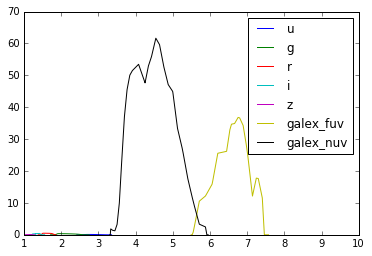

In [20]:
fig = plt.figure()
plt.plot(10**4/u.transmission[0], u.transmission[1], label='u')
plt.plot(10**4/g.transmission[0], g.transmission[1], label='g')
plt.plot(10**4/r.transmission[0], r.transmission[1], label='r')
plt.plot(10**4/i.transmission[0], i.transmission[1], label='i')
plt.plot(10**4/z.transmission[0], z.transmission[1], label='z')
plt.plot(10**4/galex_fuv.transmission[0], galex_fuv.transmission[1], label='galex_fuv')
plt.plot(10**4/galex_nuv.transmission[0], galex_nuv.transmission[1], label='galex_nuv')
plt.legend()
plt.xlim(1,10)
plt.show()

## Part (c) &mdash; Conroy extinction curve

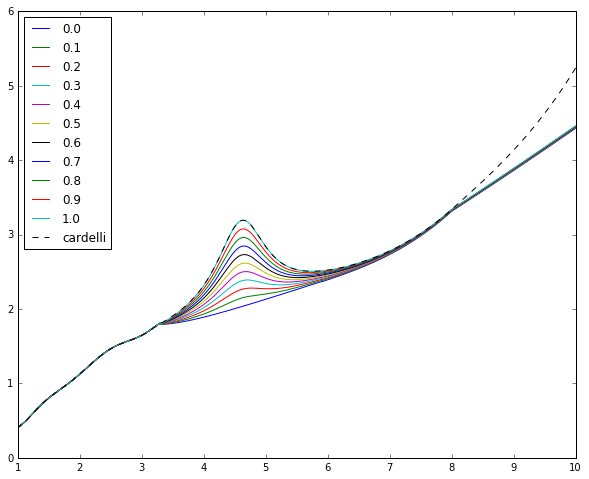

In [39]:
fig = plt.figure(figsize=(10,8))
fbumps = np.linspace(0,1,num=11)

for i in range(11):
    conroy = attenuation.conroy(lambdas, f_bump=fbumps[i])
    plt.plot(10**4/lambdas, conroy, label=str(fbumps[i]))

plt.plot(10**4/lambdas, cardelli, label='cardelli', color='k', ls='--')
plt.legend(loc=2)
plt.show()

The Cardelli and Conroy curves are equal for a bump fraction of 1.0 and only for 1/$\lambda$ $\lesssim$ 8.2 or so.

## Part (d) &mdash; Constraining bump fraction

If we want to constrain the bump fraction, then we want filters that will transmit in the region of interest, roughly 3 to 6.5 microns$^{-1}$. We also want to choose filters such that they will transmit for certain bump fractions, but not for others, such that if we see a bump through that filter, we can have a fairly good idea of what the bump fraction might be.

In [41]:
uv_filters = fsps.find_filter("uv")